In [ ]:
from google.colab import files
uploaded = files.upload()


Saving student-por.csv to student-por.csv


In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
import sklearn.utils

In [ ]:
data = pd.read_csv("student-por.csv", sep=";")
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
print(data.head())

   G1  G2  G3  studytime  failures  absences
0   0  11  11          2         0         4
1   9  11  11          2         0         2
2  12  13  12          2         0         6
3  14  14  14          3         0         0
4  11  13  13          2         0         0


In [ ]:
predict = "G3"
x = np.array(data.drop([predict], axis = 1))
y = np.array(data[predict])

In [ ]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.1)

In [ ]:
linear = linear_model.LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [ ]:
accuracy = linear.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9269450242765667


In [ ]:
print("coefficients:", linear.coef_)
print("Intercept", linear.intercept_)

coefficients: [ 0.13622161  0.89586413  0.09291161 -0.19628997  0.01992893]
Intercept -0.21830359778724429


In [ ]:
predictions = linear.predict(x_test)
results = pd.DataFrame(x_test, columns = ["G1", "G2", "Study Time", "Failures", "Absences"])
results["Predicted G3"] = predictions
results["Actual G3"] = y_test
print("\\nPredictions table: ")
print(results.to_string(index=False))

\nPredictions table: 
 G1  G2  Study Time  Failures  Absences  Predicted G3  Actual G3
 18  19           4         0         0     19.626750         19
  8  10           2         0         0     10.015934          9
 13  12           3         0         4     12.661397         13
  9  10           2         0         4     10.231871         11
 12  13           2         0         0     13.248413         13
 13  12           2         0         6     12.608344         13
 13  15           3         0         8     15.428706         15
 17  17           2         0         0     17.512977         17
 15  15           3         0         4     15.621433         15
 11   9           2         0        16      9.847597         10
 17  17           2         0         0     17.512977         18
 18  18           4         0         0     18.730886         18
 13  13           3         0         2     13.517404         13
 12  11           2         0         0     11.456684         11
 12

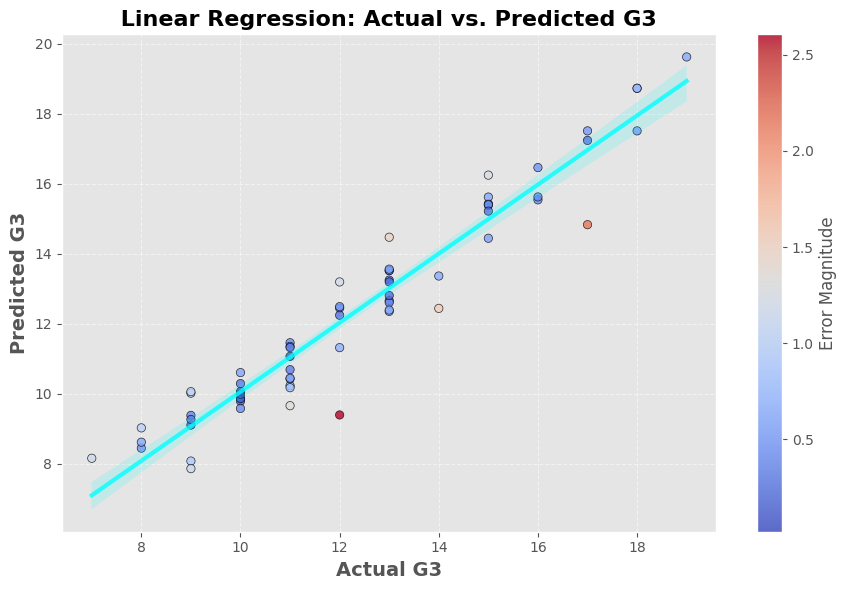

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Style settings
plt.style.use("ggplot")

# Create figure
plt.figure(figsize=(9, 6))

# Create a colormap based on actual G3 values
colors = np.abs(y_test - predictions)  # Difference between actual and predicted

# Scatter plot with color gradient
scatter = plt.scatter(y_test, predictions, c=colors, cmap="coolwarm", edgecolors="black", alpha=0.8)

# Regression line with glow effect
sns.regplot(x=y_test, y=predictions, scatter=False, color="cyan", line_kws={"linewidth": 3, "alpha": 0.8})

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label("Error Magnitude", fontsize=12)

# Labels and title
plt.xlabel("Actual G3", fontsize=14, fontweight="bold")
plt.ylabel("Predicted G3", fontsize=14, fontweight="bold")
plt.title(" Linear Regression: Actual vs. Predicted G3 ", fontsize=16, fontweight="bold")
plt.tight_layout()
# Add grid for better readability
plt.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.show()